In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [2]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
np.random.seed(100)
np.set_printoptions(linewidth=1000, suppress=True)
N = 10
x = np.linspace(0, 6, N) + np.random.randn(N)
y = 1.8*x**3 + x**2 - 14*x - 7 + np.random.randn(N)

x.shape = -1, 1
y.shape = -1, 1

In [4]:

models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression(fit_intercept=False))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', RidgeCV(alphas=np.logspace(-3,2,50), fit_intercept=False))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LassoCV(alphas=np.logspace(-3,2,50), fit_intercept=False))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', ElasticNetCV(alphas=np.logspace(-3,2,50), l1_ratio=[.1, .5, .7, .9, .95, 1], fit_intercept=False))
        ])
]

1阶，系数为： [-44.14102611  40.05964256]
5阶，系数为： [ -5.60899679 -14.80109301   0.75014858   2.11170671  -0.07724668   0.00566633]
9阶，系数为： [-2465.58381316  6108.63817712 -5111.99333504   974.74974891  1078.89649478  -829.50277842   266.13230658   -45.71741587     4.1158274     -0.15281063]


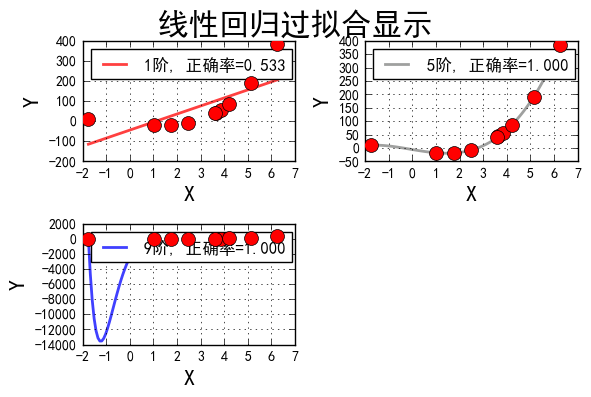

In [6]:

plt.figure(facecolor='w')
degree = np.arange(1,N,4) # 阶
dm = degree.size
colors = [] # 颜色
for c in np.linspace(16711680, 255, dm):
    c=c.astype(int)
    colors.append('#%06x' % c)

model = models[0]
for i,d in enumerate(degree):
    plt.subplot(int(np.ceil(dm/2.0)),2,i+1)
    plt.plot(x, y, 'ro', ms=10, zorder=N)

    
    model.set_params(Poly__degree=d)
    
    model.fit(x, y.ravel())
    
    lin = model.get_params('Linear')['Linear']
    output = u'%d阶，系数为：' % (d)
    print (output, lin.coef_.ravel())
    
    x_hat = np.linspace(x.min(), x.max(), num=100) 
    x_hat.shape = -1,1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    
    z = N - 1 if (d == 2) else 0
    label = u'%d阶, 正确率=%.3f' % (d,s)
    plt.plot(x_hat, y_hat, color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
    
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0,0,1,0.95))
plt.suptitle(u'线性回归过拟合显示', fontsize=22)
plt.show()

线性回归:1阶，系数为： [-44.14102611  40.05964256]
线性回归:3阶，系数为： [ -6.80525963 -13.743068     0.93453895   1.79844791]
线性回归:5阶，系数为： [ -5.60899679 -14.80109301   0.75014858   2.11170671  -0.07724668   0.00566633]
线性回归:7阶，系数为： [-41.70721172  52.38570529 -29.56451338  -7.66322829  12.07162703  -3.86969096   0.53286096  -0.02725536]
线性回归:9阶，系数为： [-2465.58381316  6108.63817712 -5111.99333504   974.74974891  1078.89649478  -829.50277842   266.13230658   -45.71741587     4.1158274     -0.15281063]
Ridge回归:1阶，系数为： [ -6.71593385  29.79090057]
Ridge回归:3阶，系数为： [ -6.7819845  -13.73679293   0.92827639   1.79920955]
Ridge回归:5阶，系数为： [-0.82920155 -1.07244754 -1.41803017 -0.93057536  0.88319116 -0.07073168]
Ridge回归:7阶，系数为： [-1.62586368 -2.18512108 -1.82690987 -2.27495708  0.98685071  0.30551091 -0.10988434  0.00846908]
Ridge回归:9阶，系数为： [-10.50566712  -6.12564342  -1.96421973   0.80200162   0.59148104  -0.23358238   0.20296996  -0.0810983    0.01325045  -0.00077212]
Lasso回归:1阶，系数为： [ -0.          29.27359177]
Lasso

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want t

Lasso回归:9阶，系数为： [-0.         -0.         -0.         -0.          0.04439727  0.05587113  0.00109023 -0.00021498 -0.00004479 -0.00000674]
ElasticNet:1阶，系数为： [-13.22089654  32.08359338]
ElasticNet:3阶，系数为： [ -6.7688595  -13.75928024   0.93989323   1.79778598]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet:5阶，系数为： [-1.65823671 -5.20271875 -1.26488859  0.94503683  0.2605984  -0.01683786]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet:7阶，系数为： [-0.         -0.         -0.         -0.15812511  0.22150166  0.02955069 -0.00040066 -0.00046568]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet:9阶，系数为： [-0.         -0.         -0.         -0.          0.05255118  0.05364699  0.00111995 -0.00020596 -0.00004365 -0.00000667]


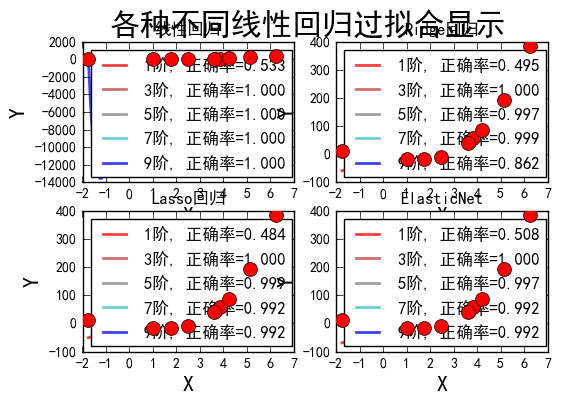

In [13]:

plt.figure(facecolor='w')
degree = np.arange(1,N, 2) # 阶
dm = degree.size
colors = [] # 颜色
for c in np.linspace(16711680, 255, dm):
    c=c.astype(int)
    colors.append('#%06x' % c)
titles = [u'线性回归', u'Ridge回归', u'Lasso回归', u'ElasticNet']

for t in range(4):
    model = models[t]
    plt.subplot(2,2,t+1)
    plt.plot(x, y, 'ro', ms=10, zorder=N)

    for i,d in enumerate(degree):
        
        model.set_params(Poly__degree=d)
        
        model.fit(x, y.ravel())

        
        lin = model.get_params('Linear')['Linear']
       
        output = u'%s:%d阶，系数为：' % (titles[t],d)
        print (output, lin.coef_.ravel())

        
        x_hat = np.linspace(x.min(), x.max(), num=100) 
        x_hat.shape = -1,1
        
        y_hat = model.predict(x_hat)
        
        s = model.score(x, y)

        
        z = N - 1 if (d == 2) else 0
        label = u'%d阶, 正确率=%.3f' % (d,s)
        plt.plot(x_hat, y_hat, color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
    
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.title(titles[t])
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.tight_layout(1, rect=(0,0,1,0.95))
plt.suptitle(u'各种不同线性回归过拟合显示', fontsize=22)
plt.show()

In [10]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot - Provides a MATLAB-like plotting framework.

DESCRIPTION
    :mod:`~matplotlib.pylab` combines pyplot with numpy into a single namespace.
    This is convenient for interactive work, but for programming it
    is recommended that the namespaces be kept separate, e.g.::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1);
        y = np.sin(x)
        plt.plot(x, y)

FUNCTIONS
    acorr(x, hold=None, data=None, **kwargs)
        Plot the autocorrelation of `x`.
        
        Parameters
        ----------
        
        x : sequence of scalar
        
        hold : boolean, optional, default: True
        
        detrend : callable, optional, default: `mlab.detrend_none`
            x is detrended by the `detrend` callable. Default is no
            normalization.
        
        normed : boolean, optional, default: True
            if True, norma